In [14]:
import numpy as np
from gallery_probes_generator import GalleryProbesGenerator

In [15]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)

gallery_names, gallery_pictures = data_generator.get_gallery()
probe_names, probe_pictures = data_generator.get_merged_probes() #changer qd la methode get_probe_total ready


In [16]:
norms = { "L1":lambda x: np.sum(np.abs(x)),
	  "L2":lambda x: np.sum(x**2),
	  "inf":lambda x: np.max(np.abs(x))
	}

def compute_distances_individual(data, query, norm="L2"):
	""" Compute distances.

	Computes the distances between the vectors (rows) of a dataset and a
	single query). Three distances are supported:
	  * Manhattan distance ("L1");
	  * squared Euclidean distance ("L2");
	  * Chebyshev distance ("inf").

	:param data: Dataset matrix with samples as rows.
	:param query: Query vector
	:type data: (n,d)-sized Numpy array of floats
	:type query: (d)-sized Numpy array of floats

	:result: The distances of the data vectors to the query.
	:rtype: (n)-sized Numpy array of floats
	"""
	norm_function = norms[norm]
	distances = np.zeros((len(data),), dtype=np.float32)
	for i, d in enumerate(data):
		distances[i] = norm_function(d-query)
	return distances

def compute_distance(gallery_pictures, probe_pictures, norm='L2'):
    total_array_distance = np.zeros(dtype=object, shape=200)
    for i, pic, in enumerate(probe_pictures):
        total_array_q = np.zeros(dtype=object, shape=273)
        for j, n in enumerate(gallery_pictures):
            total_array_q[j] = compute_distances_individual(n,pic)
            total_array_distance[i] = total_array_q
    return total_array_distance

In [17]:
#test
id_probe = 0
id_gallery = 0
probe_pictures_q = probe_pictures[id_probe]
print(probe_names[id_probe])

gallery_pictures_list = gallery_pictures[id_gallery]
print(gallery_names[id_gallery])

distance_test = compute_distances_individual(gallery_pictures_list,probe_pictures_q)
print(f"moyenne main:{np.mean(distance_test)}")
print(distance_test)

rarobi
rgspru
moyenne main:2349403.75
[2356031. 2343540. 2352341. 2339099. 2325831. 2366914. 2355874. 2344356.
 2333666. 2374452. 2344809. 2355438. 2348504. 2336556. 2354882. 2348693.
 2367286. 2350312. 2358475. 2331016.]


In [18]:
#distance = compute_distance(gallery_pictures,probe_pictures)
#print(distance.shape)

In [19]:
def radius_search_bruteforce(data, q, radius, norm = 'L2'):
    distance_matrix = compute_distance(data, q, norm)
    res_all_probe = np.zeros(dtype=object, shape=200)
    for i, row in enumerate(distance_matrix):
        id_list = []
        for j, second_row in enumerate(row):
            for k, element in enumerate(second_row):
                if element <= radius:
                    id_list.append((j,k,element))
        res_all_probe[i] = id_list
    return res_all_probe

In [20]:
resultat = radius_search_bruteforce(gallery_pictures, probe_pictures,1900000)
print(resultat)

[list([(61, 0, 1283043.0), (61, 1, 1834929.0), (61, 2, 1254391.0), (61, 3, 1133410.0), (61, 4, 1676221.0), (61, 5, 1456288.0), (61, 6, 1890632.0), (61, 7, 1813053.0), (61, 8, 1086632.0), (61, 9, 1683523.0), (61, 10, 1430964.0), (61, 12, 1377956.0), (61, 13, 1824445.0), (61, 14, 1411257.0), (61, 15, 1811536.0), (61, 16, 1630356.0), (61, 17, 1686938.0), (61, 18, 1592012.0)])
 list([(90, 11, 1757701.0)])
 list([(62, 2, 1810481.0), (62, 5, 1630835.0), (62, 6, 1450333.0), (62, 7, 1594771.0), (62, 9, 1458351.0), (62, 12, 1291438.0), (62, 15, 1636703.0), (62, 16, 1701497.0)])
 list([(83, 0, 912710.0), (83, 1, 1729084.0), (83, 7, 1241633.0), (83, 8, 1156482.0), (83, 9, 1767878.0), (83, 11, 1689564.0), (83, 12, 1024382.0), (83, 13, 1257624.0), (83, 14, 1210307.0), (83, 15, 1079801.0)])
 list([(268, 0, 1106019.0), (268, 1, 1351011.0), (268, 3, 1514169.0), (268, 6, 1364788.0), (268, 7, 1341633.0), (268, 11, 1545306.0), (268, 12, 1293536.0), (268, 13, 1143758.0), (268, 15, 1409753.0), (268, 17, 17

In [21]:
#test
i=0
tableau_150_total = np.zeros(dtype=object,shape=10)
tableau_linear_total = np.zeros(dtype=object, shape=10)
while i<10:
    tableau_150_total[i] = np.random.rand(150,150)
    tableau_linear_total[i] = np.random.rand(1,100)
    i=i+1
tableau_150_probe = np.random.rand(150,150)
tableau_linear_probe = np.random.rand(1,100)

resultat_150 = compute_distances_individual(tableau_150_total,tableau_150_probe)
resultat_linear = compute_distances_individual(tableau_linear_total,tableau_linear_probe)


In [22]:
def search_index_in_gallery(data, name):
    id_in_gallery = None
    for i, element in enumerate(data):
        if name == element:
            id_in_gallery = i
    return id_in_gallery

lcelli
234


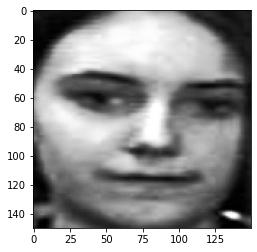

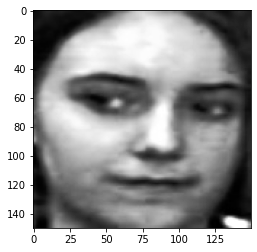

In [23]:
import matplotlib.pyplot as plt


print(probe_names[22])
index = search_index_in_gallery((gallery_names),probe_names[22])
print(index)

probe_face = plt.imshow(probe_pictures[22],cmap="gray")
plt.show()
gallery_gallery = plt.imshow(gallery_pictures[index][0],cmap="gray")
plt.show()


In [24]:
gallery_pictures_eigen_face = np.load("data/dataset1/eigen_faces_npy/gallery_pictures_eigenface.npy", allow_pickle=True)
probe_pictures_eigen_face = np.load("data/dataset1/eigen_faces_npy/probes_merged_pictures_eigenface.npy", allow_pickle=True)
resultat_eigen = radius_search_bruteforce(gallery_pictures_eigen_face, probe_pictures_eigen_face, 18000000)
print(resultat_eigen)

[list([(61, 0, 4560384.0), (61, 2, 4472424.0), (61, 3, 3097864.5), (61, 4, 10494739.0), (61, 5, 8389158.0), (61, 7, 17363212.0), (61, 8, 4107602.2), (61, 9, 17942870.0), (61, 10, 5520712.5), (61, 12, 6462456.0), (61, 14, 5685383.5), (61, 16, 9496033.0), (61, 17, 11184856.0), (61, 18, 7995168.5)])
 list([(90, 11, 12441781.0)])
 list([(62, 5, 14554057.0), (62, 6, 5326400.5), (62, 7, 9681893.0), (62, 9, 7138890.5), (62, 12, 3781834.8), (62, 15, 11784262.0), (62, 16, 11863116.0)])
 list([(83, 0, 1158475.4), (83, 1, 14561331.0), (83, 2, 11658419.0), (83, 4, 11787434.0), (83, 6, 10877587.0), (83, 7, 3473317.8), (83, 8, 3086583.2), (83, 12, 1715429.1), (83, 13, 4269023.5), (83, 14, 3388706.0), (83, 15, 1716962.4), (83, 16, 11834034.0), (83, 17, 11739806.0)])
 list([(268, 0, 4226654.5), (268, 1, 4018079.2), (268, 3, 7368385.0), (268, 6, 4192552.2), (268, 7, 3379116.5), (268, 11, 7126745.5), (268, 12, 4116839.5), (268, 13, 3390671.2), (268, 15, 3962041.0), (268, 17, 13736659.0), (268, 18, 34029

lcelli
234
[20668490.   8672953.  48682760.  21543732.  10059558.  28362222.
 38860296.  21926016.  15563835.   8005298.5 16894840.  31977694.
 24119034.  10018840.  15422077.  39827110.  12591051.  26330350.
 12080881. ]
21663528.0


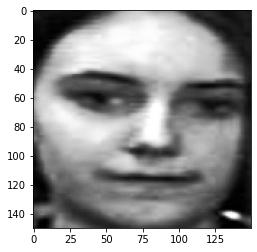

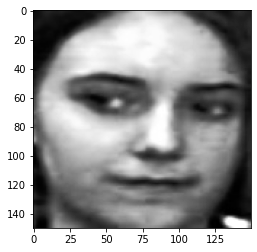

In [25]:
print(probe_names[22])
index = search_index_in_gallery(gallery_names,probe_names[22])
print(index)
distance = compute_distances_individual(gallery_pictures_eigen_face[index], probe_pictures_eigen_face[22])
print(distance)
probe_face = plt.imshow(probe_pictures[22],cmap="gray")
plt.show()
gallery_face_gallery = plt.imshow(gallery_pictures[index][0],cmap="gray")
plt.show()
print(distance.mean())

padnor
234
[ 6673623.  18429304.  14558888.  17648596.  48446496.  32578348.
 19101274.  24537928.  43559930.   7794813.5  9169521.  12950749.
 28456848.  22783684.  12022874.  14887002.  27917534.  13715769.
 42901200. ]
22007074.0


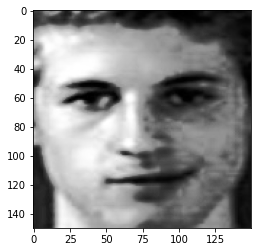

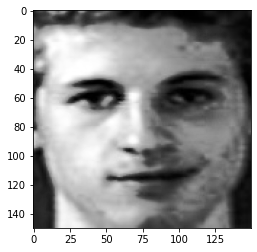

In [26]:
print(probe_names[50])
index2 = search_index_in_gallery(gallery_names,probe_names[50])
print(index)
distance2 = compute_distances_individual(gallery_pictures_eigen_face[index2], probe_pictures_eigen_face[50])
print(distance2)
probe_face = plt.imshow(probe_pictures[50],cmap="gray")
plt.show()
gallery_face_gallery = plt.imshow(gallery_pictures[index2][0],cmap="gray")
plt.show()
print(distance2.mean())

gghazv
[1.00588824e+08 9.35415680e+07 8.30377280e+07 1.02710912e+08
 7.39422160e+07 1.09138928e+08 9.10384320e+07 8.24641040e+07
 1.19709952e+08 8.21480400e+07 1.26033872e+08 9.34807680e+07
 1.21297080e+08 8.24002080e+07 9.97154640e+07 7.68263920e+07
 1.11325376e+08 1.07250184e+08 8.83373440e+07 1.08327024e+08]
97665720.0


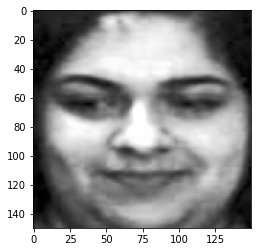

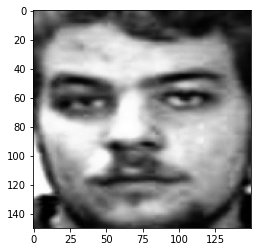

In [27]:
print(probe_names[150])
distance3 = compute_distances_individual(gallery_pictures_eigen_face[50], probe_pictures_eigen_face[150])
print(distance3)
probe_face = plt.imshow(probe_pictures[150],cmap="gray")
plt.show()
gallery_face_gallery = plt.imshow(gallery_pictures[50][0],cmap="gray")
plt.show()
print(distance3.mean())

In [28]:
print(resultat_eigen[0:100])
print("separation")
print(resultat_eigen[100:200])

[list([(61, 0, 4560384.0), (61, 2, 4472424.0), (61, 3, 3097864.5), (61, 4, 10494739.0), (61, 5, 8389158.0), (61, 7, 17363212.0), (61, 8, 4107602.2), (61, 9, 17942870.0), (61, 10, 5520712.5), (61, 12, 6462456.0), (61, 14, 5685383.5), (61, 16, 9496033.0), (61, 17, 11184856.0), (61, 18, 7995168.5)])
 list([(90, 11, 12441781.0)])
 list([(62, 5, 14554057.0), (62, 6, 5326400.5), (62, 7, 9681893.0), (62, 9, 7138890.5), (62, 12, 3781834.8), (62, 15, 11784262.0), (62, 16, 11863116.0)])
 list([(83, 0, 1158475.4), (83, 1, 14561331.0), (83, 2, 11658419.0), (83, 4, 11787434.0), (83, 6, 10877587.0), (83, 7, 3473317.8), (83, 8, 3086583.2), (83, 12, 1715429.1), (83, 13, 4269023.5), (83, 14, 3388706.0), (83, 15, 1716962.4), (83, 16, 11834034.0), (83, 17, 11739806.0)])
 list([(268, 0, 4226654.5), (268, 1, 4018079.2), (268, 3, 7368385.0), (268, 6, 4192552.2), (268, 7, 3379116.5), (268, 11, 7126745.5), (268, 12, 4116839.5), (268, 13, 3390671.2), (268, 15, 3962041.0), (268, 17, 13736659.0), (268, 18, 34029

photo entrée : 


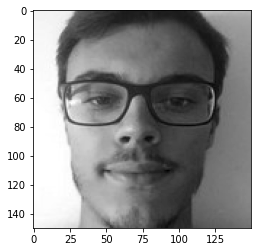

TypeError: 'int' object is not iterable

In [38]:
#test adri
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

adri_total = []
adri = mpimg.imread(f'data/dataset1/adri.2.jpg')
adri_total.append(adri)

print("photo entrée : ")
adri_face = plt.imshow(adri_total[0],cmap="gray")
plt.show()
distance = compute_distance(gallery_pictures, adri_total)
#print(distance)
#resultat_adri = radius_search_bruteforce(gallery_pictures, adri_total, 1900000)

In [66]:
from math import sqrt

def radius_opti(data):
    mean_total_list = []
    for i, row in enumerate(data):
        mean_row_list = []
        for j, element in enumerate(row):
            tmp = row
            mean_row_list.append(np.mean(compute_distances_individual(np.delete(tmp, j, axis=0), element)))
        mean_row = np.mean(mean_row_list)
        mean_total_list.append(mean_row)
    mean_total = np.mean(mean_total_list)#moyenne de distance entre deux photos d'une meme pers
    std_total = sqrt(np.var(mean_total_list))#ecart type
    return mean_total + std_total #radius opti

AssertionError: 

TypeError: 'numpy.float32' object is not callable